In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import gseapy as gp
import networkx as nx
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.n_jobs = 8
sc.set_figure_params(dpi=100, dpi_save=600, frameon=False, figsize=(5,5))
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"
%config InlineBackend.figure_format = 'retina'

In [2]:
def cal_sem(x):
    sem = stats.sem(x)
    return x.mean() - sem, x.mean() + sem

In [3]:
df = pd.read_table('../data/human_drg_indivs.txt')

In [4]:
df = df.reset_index(level=list(range(df.index.nlevels)))

In [5]:
df.columns = ['gene_id', 'gene_name', 'locus', 'Normal', 'Pain']

In [6]:
df.gene_name = df.gene_name.str.strip(' ')

In [8]:
df_normal = df.Normal.str.strip('Normal: ()').str.split(',', expand=True).astype(float).set_index(df.gene_name).rename(columns={0:'Normal_1', 1:'Normal_2', 2:'Normal_3'})

In [9]:
df_Pain = df.Pain.str.strip('Pain: ()').str.split(',', expand=True).astype(float).set_index(df.gene_name).rename(columns={0:'Pain_1', 1:'Pain_2', 2:'Pain_3'})

In [ ]:
df_normal = df_normal.T

In [ ]:
new_rnase4 = df_normal['RNASE4'].sum(1)
del df_normal['RNASE4']
df_normal['RNASE4'] = new_rnase4

/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_86759/1804640365.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_normal['RNASE4'] = new_rnase4


In [ ]:
df_normal['conditions'] = df_normal.index.str.split('_').str[0]

/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_86759/2694200863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_normal, x='conditions', y='RNASE4', ax=ax, errorbar=cal_sem, capsize=0.15, palette='tab10', fill=False, width=0.3)
/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_86759/2694200863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_normal, x='conditions', y='RNASE4', ax=ax, palette='tab10', s=12, marker='$\circ$')


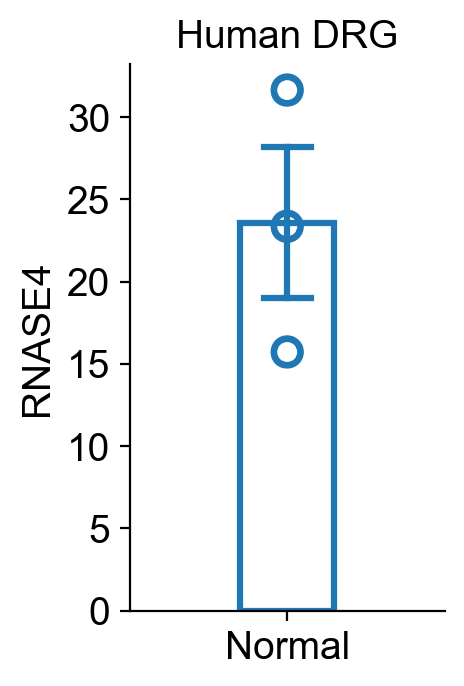

In [ ]:
fig, ax = plt.subplots(figsize=(2.5,3.5))
fig.tight_layout()
sns.barplot(data=df_normal, x='conditions', y='RNASE4', ax=ax, errorbar=cal_sem, capsize=0.15, palette='tab10', fill=False, width=0.3)
sns.swarmplot(data=df_normal, x='conditions', y='RNASE4', ax=ax, palette='tab10', s=12, marker='$\circ$')
ax.grid(False)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
ax.set_xlabel('')
ax.set_title('Human DRG')
fig.savefig('./figures/human_drg_rnase4_normal.pdf', bbox_inches='tight', dpi=300)

In [ ]:
X = pd.concat([df_normal, df_Pain], axis=1)
X = X.T
X['conditions'] = X.index.str.split('_').str[0]

In [ ]:
new_rnase4 = X['RNASE4'].sum(1)
del X['RNASE4']
X['RNASE4'] = new_rnase4

In [18]:
stats.ttest_ind(X.loc[X.conditions == 'Normal', 'RNASE4'], X.loc[X.conditions == 'Pain', 'RNASE4'],
                alternative='less', equal_var=False)

TtestResult(statistic=-0.9861706492535027, pvalue=0.19657224376017643, df=3.1733701545839312)

/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_86759/3971334335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=X, x='conditions', y='RNASE4', ax=ax, errorbar=cal_sem, capsize=0.15, palette='tab10', fill=False, width=0.5)
/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_86759/3971334335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=X, x='conditions', y='RNASE4', ax=ax, palette='tab10', s=12, marker='$\circ$')


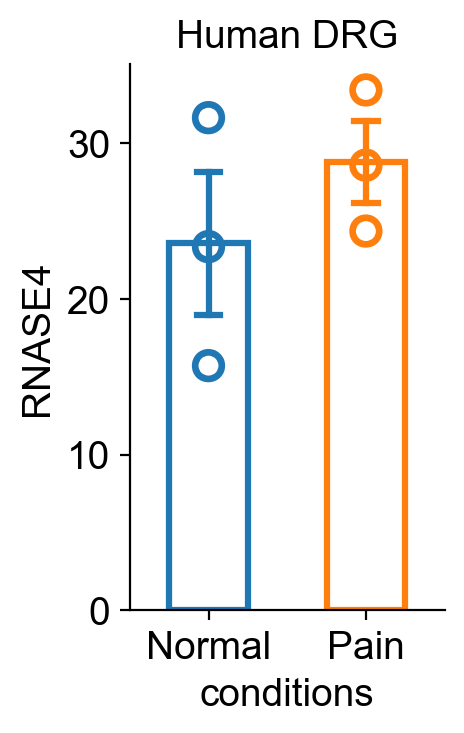

In [176]:
fig, ax = plt.subplots(figsize=(2.5,3.5))
fig.tight_layout()
sns.barplot(data=X, x='conditions', y='RNASE4', ax=ax, errorbar=cal_sem, capsize=0.15, palette='tab10', fill=False, width=0.5)
sns.swarmplot(data=X, x='conditions', y='RNASE4', ax=ax, palette='tab10', s=12, marker='$\circ$')
ax.grid(False)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_title('Human DRG')
fig.savefig('./figures/human_drg_rnase4_conditions.pdf', bbox_inches='tight', dpi=300)